# Importing libraries 


In [24]:
import pandas as pd

In [25]:
import numpy as np

In [26]:
import matplotlib.pyplot as plt

In [27]:
import seaborn as sns
import re

In [28]:
import warnings
warnings.simplefilter("ignore")

# Importing Dataset

In [29]:
data=pd.read_csv("Language Detection.csv")

In [30]:
data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [31]:
data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [32]:
#Separating Independent and Dependent features

In [33]:
X = data["Text"]
y = data["Language"]

In [34]:
print(X.count())


10337


In [35]:
print(y.count())

10337


# Label Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [37]:
# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

In [ ]:
#Bag of Words

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape

(10337, 34937)

# Train Test Splitting

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Model Training and Prediction


In [41]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [42]:
y_pred = model.predict(x_test)

# Model Evaluation




In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [50]:
print("Accuracy is :",ac)



Accuracy is : 0.9743713733075435


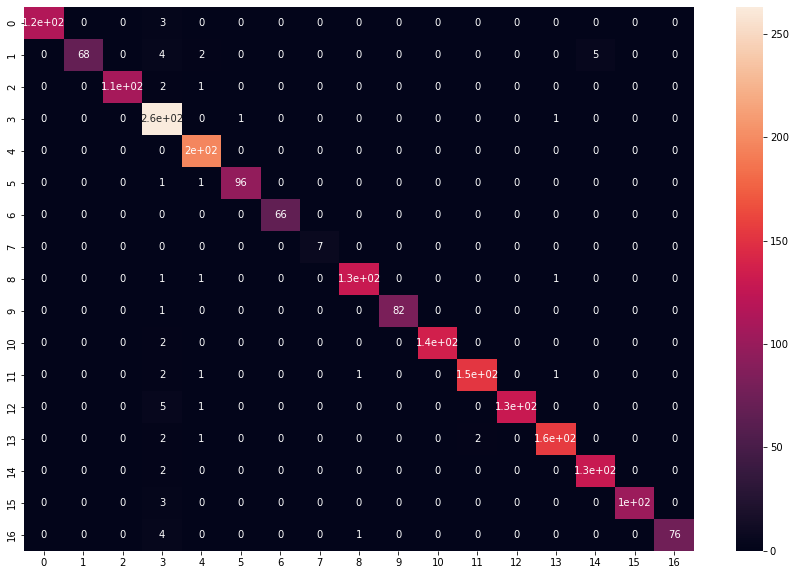

In [51]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [53]:
print(cm)

[[116   0   0   3   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  68   0   4   2   0   0   0   0   0   0   0   0   0   5   0   0]
 [  0   0 108   2   1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 263   0   1   0   0   0   0   0   0   0   1   0   0   0]
 [  0   0   0   0 197   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1   1  96   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  66   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   7   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1   1   0   0   0 130   0   0   0   0   1   0   0   0]
 [  0   0   0   1   0   0   0   0   0  82   0   0   0   0   0   0   0]
 [  0   0   0   2   0   0   0   0   0   0 136   0   0   0   0   0   0]
 [  0   0   0   2   1   0   0   0   1   0   0 153   0   1   0   0   0]
 [  0   0   0   5   1   0   0   0   0   0   0   0 130   0   0   0   0]
 [  0   0   0   2   1   0   0   0   0   0   0   2   0 156   0   0   0]
 [  0 

In [56]:
# function for predicting language
def prediction(text):
    x = cv.transform([text]).toarray()
    lang = model.predict(x)
    lang = le.inverse_transform(lang)
    print("The langauge is in",lang[0])

In [67]:
# English
prediction("Lakshmanan n")
# French
prediction("En octobre 2018, lors de l'attribution du Nobel de physique à Donna Stricklands")
# Arabic
prediction("توفو الرهيب بعض الأمثلة على كلمة فظيعة هي حوادث الاغتصاب الأخيرة في دلهي كانت فظيعة أو يتم معاملة السجنا")
# Spanish
prediction("Analytics Vidhya proporciona un portal de conocimiento basado en la comunidad para profesionales de Analytics y Data Science.")
# Malayalam
prediction("പാഴ്വസ്തു കൈകാര്യം Environmental technology  എല്ലാ ഭാഷകളിലും സ്വതന്ത്രവും സമ്പൂർണവുമായ വിജ്ഞാനകോശം നിർമ്മിക്കുവാനുള്ള ഒരു കൂട്ടായ സംരംഭമാണ് വിക്കിപീഡിയനു")
# Russian
prediction("один из самых старых и авторитетных общенаучных журнало.")
#Tamil
prediction("நீங்கள் ஒரு வேலையைப் பெறும் வரை அனுபவத்தைப் பெற முடியாத")
#Hindi
prediction("क्या आप अगले शनिवार को स्वतं")
#portugeese
prediction("Vários outros projetos de wiki-enciclopédias foram iniciados")
#Dutch
prediction("Op 15 januari 2015 kreeg de Wikipediagemeense voor ieder toegankelijke encyclopedie")
#Kannada
prediction("ನಾನು ನಿಮಗೆ ಆ ರಹಸ್ಯ ಸಲಹೆಯನ್ನು ತುಂಬಾ ನಿರರ್ಗಳವಾಗಿ")

The langauge is in English
The langauge is in French
The langauge is in Arabic
The langauge is in Spanish
The langauge is in Malayalam
The langauge is in Russian
The langauge is in Tamil
The langauge is in Hindi
The langauge is in Portugeese
The langauge is in Dutch
The langauge is in Kannada
